# AMATH 422/522 Python Lab Manual, Part 1 

This tutorial draws heavily on sources including:

* The translation of Chapter 1 of

>D. J. Higham and N.J. Higham.  
>[MATLAB Guide](http://www.ec-securehost.com/SIAM/ot92.html), Second edition,  
>Society for Industrial and Applied Mathematics, Philadelphia, PA, USA,  
>2005, ISBN 0-89871-578-4

into MATLAB code by Don MacMillen, at https://nbviewer.jupyter.org/gist/macd/10562695

* The Allen Institute's superb Python Bootcamp, at https://github.com/AllenInstitute/SWDB_2019/tree/master/PythonBootcamp

I strongly encourage you to visit the Allen's Python Bootcamp for much more -- including a general introduction to Python's fundamental data structures and objects!  Here we will focus on getting going fast with numerical computing.

It is also draws on and is inspired by some of the MATLAB Lab Manual for the text -- Dynamic Models in Biology, by Ellner and Guckenheimer -- into Python.  That Lab Manual is available (in MATLAB and R) here.  Credits for this are:  *These notes for computer labs accompany our textbook {Dynamic Models in Biology} (Princeton University
Press 2006). They are based in part on course materials 
by former TAs Colleen Webb, Jonathan Rowell and Daniel Fink at Cornell, 
Professors Lou Gross (University of Tennessee) and Paul Fackler (NC State University), and 
on the book \textit{Getting Started with Matlab} by Rudra Pratap (Oxford University Press).* 

* Finally, here is a highly recommended and freely available handbook which covers much of the material here, including numpy, scipy, plotting, and more!  https://jakevdp.github.io/PythonDataScienceHandbook/


### Jupyter Notebooks


####  First of all, you are in a Jupyter notebook.  Make sure this is running the Python 3 kernel -- you can change kernels via menu bar above, and are often prompted to select kernel when opening notebook (eg in JupyterLab).

You will find many good tutorials concerning these notebooks, and I won't try to replicate all of that material here -- please seek these out for more if you are interested, as they are wonderfully powerful and flexible.  But running from Anaconda, most of what you need to know is below:

The notebook consists of cells like this one, which can be either "text" which is written using Markdown -- see https://wordpress.com/support/markdown-quick-reference/ and for 
setting math https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/ -- or Code.

To make a new cell, you can go to the menus above and click new cell.  Then, hit m to make that a markdown cell, containing text like this, or y to make a code cell, containing executable commands.  There are also toolbar options for these (see the pulldown menu right above),  and just mouse clicking in or next to cells has quite intuitive effects. 


**Once you have what you want in a cell, hit shift-enter.**  That will either format the markdown text, or run the code in the cell.  The number in square brackets, which keeps updating as you shift-enter cells in whatever order you please, is the execution order of the cells.
For running code in cells, make sure you do that in the right order.  Finally, the Kernel menu is where to go to make sure you are running Python 3, and to stop and restart the running of cells.  It also includes a run all option that will do just that, starting at the top of the document.  

Here are some general tips on Python, many via Don McMillen (as credited above):

* Upper and lower case characters are not equivalent (Python/Numpy are case sensitive). 
* Typing the name of a variable in a code cell then hitting shift-enter will return its value. 
* Python/Numpy uses parentheses, ( ), square brackets, [ ], and curly braces, { }, and these are not interchangeable. 
* You can type help(topic) to access help on the command, function, or object topic.
* If you press the tab key after partially typing a function or variable name, IPython will attempt to complete it, offering you a selection of choices if there is more than one possible completion. 
* Keyboard shortcuts in ipython notebook are awesome.  From a cell, hit command m to toggle to command mode.  Then, you can hit a to make a cell above or b below. To toggle to edit mode (where you can type into the cell), hit enter. Play around a bit and dig it -- it's an wonderful interface.  More keyboard shortcuts:  https://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/






#### OK, let's get cooking!

Python has substantial built-in functionality, but for scientific computing we'll always import additional packages (or modules), and give their contents a prefix name (that's the "as").   

In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

You can simply type an operation into a cell, and hit shift-enter to execute it

In [2]:
2+3

5

The basic arithmetic operations are `+ - * / `  
**MATLAB GOTCHA:** To take a number to a power use ` ** ` not ` ^ `

In [3]:
2^3   #DO NOT DO THIS IF YOU WANT A POWER (INSTEAD IS A LOGICAL OPERATION IN PYTHON)

1

In [4]:
2**3  #aaaah .... that gives the power

8

Define some variables that are scalars.  

* Note that variable names can combine letters and numbers and the symbol _, and may not begin with a number.    

Here we use multiple lines in a cell.  The last line causes the variable's value to be displayed.

In [5]:
a_1=2
a_2=3
a_3=a_1**a_2
a_3

8

#### Arrays
Define a variable that is a numpy array.  
These are rectangular tables of numbers that we will operate on.
A 1-dimensional array is a list of numbers (like a vector).  A 2-dimensional array is a table, and so on.
This example sets up a 3 element 1-dimensional array, which is also called a vector. 


In [6]:
c = np.array([1, 2, 3])
print(c)   # we could also just type c here, but this gives a more readable output format

[1 2 3]


The basic arithmetic operations are applied elementwise to the array

In [7]:
c+1

array([2, 3, 4])

In [8]:
c/2

array([0.5, 1. , 1.5])

In [9]:
c**2

array([1, 4, 9], dtype=int32)

In [10]:
2**c   #applies an array of powers to a scalar

array([2, 4, 8], dtype=int32)

Numpy has many mathematical functions that operate on arrays element wise when given an array argument. For example,

In [11]:
np.exp(c)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [12]:
np.log( np.exp(c))     

array([1., 2., 3.])

In [13]:
np.sqrt(c)

array([1.        , 1.41421356, 1.73205081])

We can also do element-wise operations on pairs of arrays.

In [14]:
c=np.array([1,2,3])
d=np.array([4,5,6])
print(c+d)
print(c/d)

[5 7 9]
[0.25 0.4  0.5 ]


### MATLAB GOTCHA:  
`*` gives element-wise multiplication.  This is **NOT** a 'basic' linear algebra vector/matrix operation, like an innner (dot) or outer product (that said it does have a name, the Hadamard product).

In [15]:
print(c*d)

[ 4 10 18]


To do a dot product, use `np.dot`

In [16]:
np.dot(c,d)

32

On to two-dimensional arrays, or matrices.  We enter these as a list of 'row' lists.  I'm going to use `_mat` in my filename to remind us that this is a matrix; this is, of course, just naming and has no other effect.

In [17]:
f_mat= np.array([[1, 1 ,1], [2, 2 , 2]])
print(f_mat)


[[1 1 1]
 [2 2 2]]


Check the shape of our array:

In [18]:
np.shape(f_mat)

(2, 3)

Now we can do a matrix-vector product.  First, define a vector

In [19]:
c_vect=np.array([1,2,3])
print(c_vect)

[1 2 3]


Now use **np.dot** to do a matrix-vector product

In [20]:
d_vect=np.dot(f_mat,c_vect)
print(np.shape(f_mat))
print(np.shape(c_vect))
print(d_vect)

(2, 3)
(3,)
[ 6 12]


There is another, simpler notation for matrix-matrix or matrix-vector products as well:  the `@` symbol

In [21]:
f_mat @ c_vect

array([ 6, 12])

You have to get the alignment correct, so that matrix multiplication makes sense.  This does and should return an error:

In [22]:
print(np.shape(c_vect))
print(np.shape(f_mat))
np.dot(c_vect,f_mat)

(3,)
(2, 3)


ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

But we can use **transpose**, and then do a valid matrix operation (left-multiply by row vector).  Note that the vector is interpreted as a row or a column vector depending on what makes sense for the dot operation

In [23]:
g_arr=np.transpose(f_mat)
print(np.shape(c_vect))
print(np.shape(g_arr))
np.dot(c_vect,g_arr)

(3,)
(3, 2)


array([ 6, 12])

For square 2-D arrays (equivalent to square matrices), we can perform matrix powers, using `np.linalg.matrix_power`

In [24]:
A_mat = np.array([[ 0,1], [1,0 ]])
print(A_mat)

B_mat = np.linalg.matrix_power(A_mat, 2)
print(B_mat)

C_mat = np.linalg.matrix_power(A_mat, 3)
print(C_mat)

[[0 1]
 [1 0]]
[[1 0]
 [0 1]]
[[0 1]
 [1 0]]


An aside on objects and function calls

Arrays (and all data types) are objects.  This means that they have functions attached them, that you can call using a dot after the variable name.  For example, see this handy shorhand for the shape function call above:

In [25]:
f_mat.shape

(2, 3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Other mathematical functions</h3>

<p>NumPy includes an extensive library of mathematical functions that operate on arrays. The full list can be found here: 
 
 <a href="https://docs.scipy.org/doc/numpy/reference/routines.math.html">Mathematical functions</a>
</div>

### Making and addressing Numpy arrays

Address arrays via indices.  Python uses [] to index into arrays.  
**Matlab Gotcha:  INDEXING STARTS AT 0.**

In [26]:
a_arr=np.array([1,2,3])
print(a_arr[0])
print(a_arr[1])
a_arr[1]=-2
print(a_arr)

1
2
[ 1 -2  3]


In [27]:
b_mat=np.array([[1,2],[3,4]])
print(b_mat[0,0])

1


There are lots of ways to make arrays besides just typing them in.  Here are three of the most common:
* np.arange(start,stop), where start and stop are two integers, makes list from start to stop-1
* np.zeros(length), which makes an array of zeros of the given length
* np.linspace(start,stop,num)  #linspace returns array of num values between start and stop



In [28]:
k_arr=np.arange(0,20)
print(k_arr)
h_arr=np.zeros(20)
print(h_arr)
x_array=np.linspace(0,2*np.pi,5) 
print(x_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         1.57079633 3.14159265 4.71238898 6.28318531]


It is also helpful to adjust the formatting with which arrays are printed out.  This is done with the following command.  Here, `precision` is the number of digits after the decimal.  `suppress=True` will keep scientific notation from being used for small numbers (doesn't change formatting here, but will come up later in course.)  

In [29]:
np.set_printoptions(precision=3, suppress=True)
print(x_array)

[0.    1.571 3.142 4.712 6.283]


Slicing is a way to access sub-regions of arrays.  The key is the colon, in syntax k_arr=[min_index:max_index].  This returns the values between min_index and **max_index-1.**   That ''missing'' top index confuses me at least often and is another **MATLAB GOTCHA.** 

In [30]:
print(k_arr[0:1])  #Note the "missing" top index in what is sliced out
print(k_arr[0:4])  #Likewise

[0]
[0 1 2 3]


In [31]:
# Slice from the beginning until the 7th element
print(k_arr[:7])

[0 1 2 3 4 5 6]


In [32]:
# Slice from the 11th element until the end
print(k_arr[11:])

[11 12 13 14 15 16 17 18 19]


In [33]:
# Return the LAST element of an array
print(k_arr[-1])

19


**Sorting elements in an array**

In [34]:
z_arr=np.array([3,2,4,1])
print('z_arr=',z_arr)

z_arr= [3 2 4 1]


Using `np.argsort' returns the **indices** of the lowest to highest values, in order (**not** the order of each value)

In [42]:
idx=np.argsort(z_arr)
print('idx=',idx)

idx= [3 1 0 2]


In [43]:
print(z_arr[idx])  #To re-arrange according to this order

[1 2 3 4]


##### Two-D arrays
Similar syntax for two-D arrays.  Here we extract part of the first column:

In [44]:
g_mat=np.array([[1,2],[3,4],[5,6]])
print(g_mat)
print(g_mat[0:2,0])

[[1 2]
 [3 4]
 [5 6]]
[1 3]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise T1 (From the Allen tutorials):</b>

Use <code>np.array</code> to create a 3-dimensional array with the shape (2, 4, 3).  Also, explore how the colon operation works here -- write a sentence on what you find.

</div>

In [53]:
fib = np.array([[[0,1],[1,2]],[[3,5],[8,13]]])
print('fib = ',fib,'\n')
print('vector = ',fib[1,0:2,1],'\n')
print('matrix = ',fib[0:2,0,0:2])

fib =  [[[ 0  1]
  [ 1  2]]

 [[ 3  5]
  [ 8 13]]] 

vector =  [ 5 13] 

matrix =  [[0 1]
 [3 5]]


The 3D array **fib** is a simple cube containing the first 8 Fibonacci numbers.

### Data types

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>All elements in arrays are of the same data type. 

<p>There are many other options we can pick from. Whether we <b>care</b> enough to worry about dtype depends on what we want to do with the array, and whether we are likely to run out of memory. Some of the most commonly used dtypes are listed here:

<table style="margin-left: 50px">
<tr><td> dtype  </td><td> bytes     </td><td> precision  </td><td> approx. range       </td></tr>
<tr><td>float64 </td><td> 8         </td><td> 16         </td><td> ±10<sup>308</sup>   </td></tr>
<tr><td>float32 </td><td> 4         </td><td> 7          </td><td> ±10<sup>38</sup>    </td></tr>
<tr><td>int64   </td><td> 8         </td><td> 0          </td><td> ±10<sup>18</sup>    </td></tr>
<tr><td>int32   </td><td> 4         </td><td> 0          </td><td> ±10<sup>9</sup>     </td></tr>
<tr><td>int16   </td><td> 2         </td><td> 0          </td><td> ±10<sup>4</sup>     </td></tr>
<tr><td>uint64  </td><td> 8         </td><td> 0          </td><td> 0 to 10<sup>19</sup></td></tr>
<tr><td>uint32  </td><td> 4         </td><td> 0          </td><td> 0 to 10<sup>9</sup> </td></tr>
<tr><td>uint16  </td><td> 2         </td><td> 0          </td><td> 0 to 10<sup>4</sup> </td></tr>
<tr><td>uint8   </td><td> 1         </td><td> 0          </td><td> 0-255               </td></tr>
<tr><td>bool    </td><td> 1         </td><td> 0          </td><td> 0-1                 </td></tr>
</table>

<br>

<a href="https://docs.scipy.org/doc/numpy/user/basics.types.html">Data types</a>

<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html">numpy.ndarray</a>


----------------------
A standard choice for this, for numerical computing, is a 64-bit (8 byte) floating-point number, and you'll see that this gives your arrays the maximum possible range.  Many ways of creating an array give you this dtype.

Some commands, like  <b>arange</b>, or making an array full of integers, make arrays of integer type by default, so especially if you are running into overflow problems, it's a good idea to check this type.  

To check datatype, use <b>.dtype</b> (see below).
    
To convert an array to a different dtype, you can use the <b>astype()</b> method.  
    
<b>But perhaps the easiest -- and what we do below -- is to specify your datatype when making an array. (see below, and note syntax np.float64) </b> 
    
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

Here we make an array of integers, and see that it is of integer type

In [54]:
a_arr=np.array([0,1,2])
print(a_arr.dtype)

int32


Nicely, it gets coverted automatically if we operate on it to make non-itegers

In [55]:
b_arr=a_arr/2
print(b_arr.dtype)

float64


Or, we could have made it a float array in the first place

In [56]:
a_arr=np.array([0,1,2],dtype=np.float64)
print(a_arr.dtype)

float64


Similar situation with using `arange`

In [57]:
a_arr=np.arange(1,5)
a_arr.dtype

dtype('int32')

In [58]:
b_arr=np.arange(1,5,dtype=np.float64)
b_arr.dtype

dtype('float64')

### For loops

First, we need to define what we'll be looping over, the iterator.  
Here, this is the numpy array iter_arr, which counts which generation we are on.  Much more general lists can be used, too.

In [59]:
iter_arr=np.arange(1,5)
print(iter_arr)

[1 2 3 4]


Next, we write the loop.  This assigns each element of the iterator to a variable (here, `i`) in turn, and runs the block of indented code each time.

In [60]:
for i in iter_arr:
    print(i)

1
2
3
4


### Note the indentation!  This is something special to Python, and takes the place of typical `end` statements to demarcate code blocks.  
We'll see this again in function definitions below.  The key thing to remember is to use the tab key to indent, and that all code at a given level of indentation is blocked together.  An example:

In [61]:
for i in iter_arr:
    print(i)
    print(i**2)
    print("on to the next iteration")
    
print("done with for loop")

1
1
on to the next iteration
2
4
on to the next iteration
3
9
on to the next iteration
4
16
on to the next iteration
done with for loop


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise T2 (From the Allen tutorials):</b>

<p>Create a 1-d numpy array (call it <code>ts</code> for timestamps), with increasing integers from 3 to 300 (including 3 but not 300) with increment of 3, and print the array

</div>

In [66]:
ts = np.linspace(3,297,99,dtype=np.int32)
print(ts)

[  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105 108
 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159 162
 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207 210 213 216
 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261 264 267 270
 273 276 279 282 285 288 291 294 297]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise (From the Allen tutorials):</b>

<p>Create a 1-d numpy array of the first 10,000,000 integers, and call it x. Compute x+x^2+x^3 two ways 1) By using "vectorized computations" on a single line, and once by using a for loop.  Bonus:  Find (web search) commands to time an operation.  Which takes longer? 

</div>

In [81]:
x = np.arange(1,10000001,dtype=np.float32)
y = x + x**2 + x**3
print(x[-1])
print(y[-1])
#for i in x:
#    x[i-1] = i + i**2 + i**3
#print(z.shape)

10000000.0
1.0000001e+21


In [75]:
x=np.arange(100000001)
x.dtype

dtype('int32')

This gives the wrong answer -- as overflowing the max integer size

In [76]:
bigx1=x+x**2+x**3
print(bigx1[-1])
bigx1.dtype

381083904


dtype('int32')

We get the right answer by making the data type have the required huge range

In [77]:
x=np.arange(100000001,dtype=np.float64)

In [78]:
bigx1=x+x**2+x**3
print(bigx1[-1])

1.0000000100000001e+24


Within the for loop, we can use an integer for the iteration, but need to make sure that the array with huge entries has enough range (float64).

In [72]:
iter=np.arange(100000001)
bigx2=np.zeros(100000001,dtype=np.float64)

for i in iter:
        bigx2[i]=x[i]+x[i]**2+x[i]**3
        
print(bigx2[-1])       

1.0000000100000001e+24


## Defining functions
Above we used a number of built-in functions, or functions from the numpy package, such as `shape.`.
Here we'll define our own functions.  The syntax begins with `def` and once again follows with indented text:

In [82]:
# Define a function called "my_power_func" that requires 2 arguments (inputs)
# called "x" and "y" and returns x**y

def my_power_func(x, y):   
    """Take x to power y and return value"""
    # Use indented code block again
    z = x**y
    return z

# Run the function here, with scalar arguments
print(my_power_func(2, 3))

# It also works with numpy array arguments
print(my_power_func(np.array([1,2]),3  ))

8
[1 8]


The thing in triple quotes above is the docstring -- documentation for a function.  It can be retreived via help, as follows. That's cool!  A step on your way to making general, useful, re-usable code for yourself and for others! 

In [83]:
help(my_power_func)

Help on function my_power_func in module __main__:

my_power_func(x, y)
    Take x to power y and return value



**Variable scope.**  Most variables we've defined so far are accessible throughout the notebook; that is, they have  "global scope."  Variables newly defined inside a function have "local scope" meaning they are only defined within the function.  For example:

In [84]:
def add_special_number_func(x):
    """ add a hard coded value for some reason """
    value_to_add=5
    return x+value_to_add

print(add_special_number_func(1))

6


This returns an error:

In [85]:
print(value_to_add)

NameError: name 'value_to_add' is not defined

### Plot!

* matplotlib is a plotting library for python, imported above.

* See many examples, with code, at http://matplotlib.org/gallery

* Here we will show the most basic syntax only -- do head to the gallery for much much more, from different types of plots to basics like adding legends, etc

Text(0.5, 1.0, 'sin(x)')

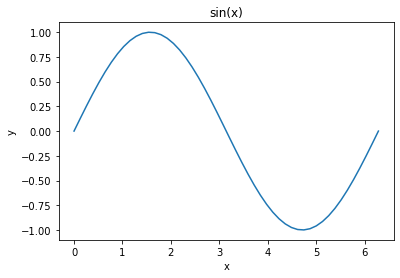

In [86]:
x_array=np.linspace(0,2*np.pi,50)  #linspace returns array of 50 values between 0 and 2 pi
y_array=np.sin(x_array)

plt.plot(x_array,y_array)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise T3:</b>

<p>Head to the gallery via the link above.  Look at the examples, and then -- Add another plot to the same graph above, this one a cosine.  Make it red.  Also, add a legend.

</div>

# Random numbers
### Initializing a random number generator

First we need to initialize a random number GENERATOR (rng).  We do this by calling `default_rng` from the submodule (I think of this as a sub-package, or subfolder of functions) `random` within numpy.  

* Note that we pass no argument.  This will draw a "high entropy" (unpredictable) seed from the operating system.


In [88]:
print(np.__version__)
rng = np.random.default_rng()

1.16.4


AttributeError: module 'numpy.random' has no attribute 'default_rng'

Now we're ready to go!  Let's generate an 1-D array of uniformly distributed random variables in the range [0,1), of length 10.  We use syntax `rng.uniform(left_limit,right_limit,length)`

In [8]:
a = rng.uniform(0,1,10)
print(a)

[0.94931251 0.67789142 0.90748562 0.15392229 0.99101479 0.96623307
 0.64349648 0.74803449 0.34166496 0.74549894]


Similar syntax for a 2-D array, or a higher-dimensional array as well!  We swap out the length with the size of the array, in round brackets (formally that is called a tuple in python).


In [5]:
a = rng.uniform(0,1,(3,3))
print(a)

[[0.7219396  0.94661132 0.97974265]
 [0.61249947 0.82217393 0.29429394]
 [0.86373734 0.47631848 0.35972457]]


We are creating numpy arrays, as before and as expected!  We can confirm that using:

In [6]:
type(a)

numpy.ndarray

Similar syntax for a gaussian (normal) distribution, with mean mu, standard deviation sigma:  `rng.normal(mu,sigma,size)`

In [7]:
a = rng.normal(0,1,(3,3))
print(a)

[[-0.13134836 -0.21815104  0.18071116]
 [ 0.79959928 -0.05526139 -0.79814042]
 [ 0.18098562  0.17835121 -0.32827815]]


### A note on seeds  
Let's do this process again

In [9]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
print(a)

[0.08777923 0.46938361 0.01529256 0.89096258 0.14996301]


And again, this time asking for two random arrays as well

In [10]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
b = rng.uniform(0,1,5)
print(a)
print(b)

[0.12502986 0.25807331 0.88344314 0.85012846 0.36609768]
[0.43202719 0.44940514 0.73350358 0.19256735 0.62511856]


Each time above get something different, as expected:  a new seed is drawn from the operating system when we make the rng, and then it keeps advancing as we call it.

* But, what if we want to re-use a random sequence?  We specify the seed when making the rng, as an integer -- creating reproducible behavior.  Depending on your objectives, this can be good, or very bad!

In [11]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]


In [14]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)
b = rng.uniform(0,1,5)
print(b)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]
[0.93888454 0.17861445 0.58864721 0.44279917 0.34884712]


There are tons more distributions that can be sampled using our rng.  Check out the documentation ... https://numpy.org/doc/stable/reference/random/generator.html

### Initializing a random number generator

First we need to initialize a random number GENERATOR (rng).  We do this by calling `default_rng` from the submodule (I think of this as a sub-package, or subfolder of functions) `random` within numpy.  

* Note that we pass no argument.  This will draw a "high entropy" (unpredictable) seed from the operating system.


In [3]:
rng = np.random.default_rng()

Now we're ready to go!  Let's generate an 1-D array of uniformly distributed random variables in the range [0,1), of length 10.  We use syntax `rng.uniform(left_limit,right_limit,length)`

In [8]:
a = rng.uniform(0,1,10)
print(a)

[0.94931251 0.67789142 0.90748562 0.15392229 0.99101479 0.96623307
 0.64349648 0.74803449 0.34166496 0.74549894]


Similar syntax for a 2-D array, or a higher-dimensional array as well!  We swap out the length with the size of the array, in round brackets (formally that is called a tuple in python).


In [5]:
a = rng.uniform(0,1,(3,3))
print(a)

[[0.7219396  0.94661132 0.97974265]
 [0.61249947 0.82217393 0.29429394]
 [0.86373734 0.47631848 0.35972457]]


We are creating numpy arrays, as before and as expected!  We can confirm that using:

In [6]:
type(a)

numpy.ndarray

Similar syntax for a gaussian (normal) distribution, with mean mu, standard deviation sigma:  `rng.normal(mu,sigma,size)`

In [7]:
a = rng.normal(0,1,(3,3))
print(a)

[[-0.13134836 -0.21815104  0.18071116]
 [ 0.79959928 -0.05526139 -0.79814042]
 [ 0.18098562  0.17835121 -0.32827815]]


### A note on seeds  
Let's do this process again

In [9]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
print(a)

[0.08777923 0.46938361 0.01529256 0.89096258 0.14996301]


And again, this time asking for two random arrays as well

In [10]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
b = rng.uniform(0,1,5)
print(a)
print(b)

[0.12502986 0.25807331 0.88344314 0.85012846 0.36609768]
[0.43202719 0.44940514 0.73350358 0.19256735 0.62511856]


Each time above get something different, as expected:  a new seed is drawn from the operating system when we make the rng, and then it keeps advancing as we call it.

* But, what if we want to re-use a random sequence?  We specify the seed when making the rng, as an integer -- creating reproducible behavior.  Depending on your objectives, this can be good, or very bad!

In [11]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]


In [14]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)
b = rng.uniform(0,1,5)
print(b)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]
[0.93888454 0.17861445 0.58864721 0.44279917 0.34884712]


There are tons more distributions that can be sampled using our rng.  Check out the documentation ... https://numpy.org/doc/stable/reference/random/generator.html

# Flow control

The material below draws on tutorial 2 of ...

* The Allen Institute's superb Python Bootcamp, at https://github.com/AllenInstitute/SWDB_2019/tree/master/PythonBootcamp

I strongly encourage you to visit the Allen's Python Bootcamp for much more -- including a general introduction to Python's fundamental data structures and objects!  Here we will focus on getting going fast with numerical computing.

<p><b>Documentation:  </b> <a href=https://docs.python.org/3/tutorial/controlflow.html>Control Flow</a>
</div>



## Conditionals: if, elif, and else

A code block following `if` will be run if the corresponding logical test is `True` 

In [6]:
x = 2

if x == 3:
    print("x equals 3")
    
if x == 2:
    print("x equals 2")

x equals 2


Note once again that the body of the statement is demarcated by indentation.

Here, the `==` gives a logical test that returns a boolean value (`True` or `False`)

In [7]:
print(x==2)

True


Here are similar expressions:

In [8]:
print(x > 2)   
print(x <= 2)  # less than or equal
print(x != 2)  # not equal

False
True
False


Several expressions can be connected via `and` or `or`

In [10]:
print((x >= 2) and (x < 10))
print((x >= 2) or (x > 10))

True
True


To implement a sequence of tests:  if, else if, else if, ..., else, one can optionally add other conditionals to the original if statement.  The syntax for "else if" in python is `elif`.

Python begins with the first conditional.  If the first conditional is true, it runs the corresponding code block and then terminates (it will not go to the next conditionals down the list). If the first conditional is false, it moves on to the next conditional.  

Try the following with x changed to 0.9 and other values to see how this works.

In [15]:
x=1.9

if x < 1:
    print("x is less than 1")
elif x<2: 
    print("x is less than 2 but not less than 1")
else: 
    print("x is not less than 1 and not less than 2")


x is less than 2 but not less than 1


## Maximum / minimum operations

To get the largest element in an array, use max

In [ ]:
a=np.array([1,2,3])
np.max(a)

To get the largest element from comparing TWO arrays, use maximum

np.maximum(a,4)

In [ ]:
np.maximum(a,0)

MATLAB GOTCHA:  these are not interchangeable -- that is, if you try maximum with just one input argument, it will not work:

In [ ]:
np.maximum(a)

MATLAB GOTCHA:  these are not interchangeable -- moreover, using max will not always give a 'full array' output, again unlike MATLAB ... 

In [ ]:
np.max(a,0)